<a href="https://colab.research.google.com/github/luchiip/LuisanaPadilla_CH_DataScientistII/blob/main/CervezaConSalud%2BPadilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de Cerveza: Puede convertirse en un hábito más saludable?

## Abstract:

El consumo de cerveza es una práctica cultural y social extendida, pero su ingesta excesiva se asocia con diversos riesgos para la salud, incluidas enfermedades relacionadas con el alcohol. Este estudio analiza si el consumo de cerveza puede convertirse en un hábito más saludable a través del uso de tres conjuntos de datos: (1) consumo de cerveza per cápita por país, (2) características y rankings de cervezas, y (3) causas de muerte por país, incluyendo aquellas relacionadas con el consumo de alcohol. Al identificar correlaciones entre los niveles de consumo de cerveza y los efectos en la salud, así como analizar los atributos de las cervezas mejor valoradas, esta investigación examina el potencial de desarrollar cervezas sin alcohol que imiten las características de las opciones tradicionales. Los hallazgos buscan aportar información sobre si la sustitución de la cerveza tradicional por alternativas sin alcohol de alta calidad podría reducir los riesgos para la salud, manteniendo la satisfacción del consumidor. Este enfoque podría servir para el desarrollo de estrategias de salud pública y fomentar innovaciones en la industria cervecera que promuevan un consumo más responsable sin perder su valor cultural.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hipótesis - Preguntas relevantes:

* **1. ** En países donde la cerveza es la bebida alcohólica más consumida, el consumo de otras bebidas alcohólicas (vino, licores) es relativamente menor en comparación con el promedio mundial. Estos países pueden representar una buena alternativa para emprender negocios de comercialización de cervezas sin alcohol.
¿Que países muestran un mayor consumo de cerveza como la bebida con alcohol de preferencia?

* **2. ** Los países con mayor consumo de cerveza per cápita presentan tasas más altas de enfermedades relacionadas con el alcohol, como cirrosis y trastornos por consumo de alcohol.
¿Existe una relación directa entre los países con mayor consumo de cerveza y las tasas de enfermedades relacionadas con el alcohol?

* **3. ** La percepción de calidad en una cerveza sin alcohol está directamente relacionada con la fidelidad en la reproducción de sus características.
¿Qué características de las cervezas mejor valoradas pueden ser replicadas en una versión sin alcohol para hacerla más atractiva?

* **4. ** En mercados donde se valora la cerveza artesanal y de calidad premium, la aceptación de alternativas sin alcohol con características similares es más alta.
¿Existe alguna relación entre la popularidad de ciertas características de las cervezas y la percepción de un consumo "más saludable", que podría favorecer el desarrollo de alternativas sin alcohol?

## Datasets:

In [49]:
from google.colab import drive
drive.mount ('/content/gdrive')
%cd /content/gdrive/MyDrive/LuisanaPadilla_CODERHOUSE_DataScientistII

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/LuisanaPadilla_CODERHOUSE_DataScientistII


In [50]:
Drinks = pd.read_csv("drinks.csv")
Death = pd.read_csv("Death_causes2.csv")
BeerRanking = pd.read_excel("Beer Descriptors Simplified.xlsx")

Se seleccionaron estos datasets para tratar de responder las incognitas que se plantearon anteriormente.

En especial el dataset "Death", contiene datos sobre la cantidad de muertes según diferentes causas. De acuerdo a múltiples estudios, el alcohol está relacionado con cancer, enfermemdades cardiovasculares, hepaticas, entre otras; la mayoría de ellas están señaladas en dicho dataset.

## Analisis de datasets


* DRINKS DataSet:

In [51]:
Drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [52]:
Drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [53]:
Drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [54]:
Drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5
192,Zimbabwe,64,18,4,4.7


* Death DataSet:

In [55]:
Death.head()

,Country/Terrain,Acute hepatitis,Alcohol use disorders,Alzheimer's/dementias,Cardiovascular diseases,Conflict/terrorismum,Diabetes,Diarrheal diseases,Digestive diseases,Drowning,...,Maternal disorders,Malaria,HIV/AIDS,Drug use disorders,Environmental heat and cold exposure,Exposure of nature,Lower respiratory infectionses,liver diseases,kidney disease,Interpersonal violence
0,Afghanistan,98108,3257,41998,1607042,280520,93207,245832,186959,56536,...,129621,13924,4282,7094,2187,16770,822179,98419,134676,108228
1,African Region (WHO),525499,163833,1252189,24875081,1402850,3602991,24485553,7763233,801804,...,2740727,21462693,28888674,53177,152369,27009,23007934,4578870,2779058,2056987
2,Albania,44,458,16549,270603,2145,4055,677,14907,2397,...,246,0,57,634,164,89,26402,8717,7636,5242
3,Algeria,10492,2748,86914,2123720,30947,89035,34410,146527,24273,...,29475,70,6101,10612,1041,4032,179379,91927,154666,16702
4,American Samoa,0,17,143,2851,10,970,89,341,120,...,30,0,15,0,25,41,328,181,512,101


In [56]:
Death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Country/Terrain                       221 non-null    object
 1   Acute hepatitis                       221 non-null    int64 
 2   Alcohol use disorders                 221 non-null    int64 
 3   Alzheimer's/dementias                 221 non-null    int64 
 4   Cardiovascular diseases               221 non-null    int64 
 5   Conflict/terrorismum                  221 non-null    int64 
 6   Diabetes                              221 non-null    int64 
 7   Diarrheal diseases                    221 non-null    int64 
 8   Digestive diseases                    221 non-null    int64 
 9   Drowning                              221 non-null    int64 
 10  Tuberculosis                          221 non-null    int64 
 11  Terrorism (deaths)              

In [57]:
Death.describe()

,Acute hepatitis,Alcohol use disorders,Alzheimer's/dementias,Cardiovascular diseases,Conflict/terrorismum,Diabetes,Diarrheal diseases,Digestive diseases,Drowning,Tuberculosis,...,Maternal disorders,Malaria,HIV/AIDS,Drug use disorders,Environmental heat and cold exposure,Exposure of nature,Lower respiratory infectionses,liver diseases,kidney disease,Interpersonal violence
count,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,...,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,221.000000,221.000000,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02
mean,4.998931e+04,7.310683e+04,4.885100e+05,6.455916e+06,4.479900e+04,4.657548e+05,8.979011e+05,9.564608e+05,1.297005e+05,6.056124e+05,...,1.037937e+05,3.435569e+05,4.977743e+05,4.369497e+04,24900.995475,19724.457014,1.174097e+06,5.365266e+05,4.259668e+05,1.782312e+05
std,2.497310e+05,2.859644e+05,1.805343e+06,2.146425e+07,1.861858e+05,1.416541e+06,4.229992e+06,2.960468e+06,5.054883e+05,2.665436e+06,...,4.421502e+05,2.116779e+06,2.799642e+06,1.711147e+05,106192.734087,78001.255125,3.773627e+06,1.642804e+06,1.311220e+06,5.739997e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,0.000000e+00,3.000000e+01,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2.400000e+01,0.000000e+00,6.000000e+00,0.000000e+00
25%,8.600000e+01,3.460000e+02,3.887000e+03,9.403800e+04,1.200000e+01,9.045000e+03,9.670000e+02,1.157800e+04,1.220000e+03,1.322000e+03,...,1.950000e+02,0.000000e+00,5.410000e+02,1.680000e+02,105.000000,24.000000,1.410000e+04,6.088000e+03,6.336000e+03,1.850000e+03
50%,6.800000e+02,2.876000e+03,2.434000e+04,4.239750e+05,2.800000e+02,3.751200e+04,1.511700e+04,8.124200e+04,7.005000e+03,1.757200e+04,...,2.286000e+03,1.200000e+01,6.276000e+03,9.520000e+02,923.000000,191.000000,8.230900e+04,4.671800e+04,3.330900e+04,1.086100e+04
75%,6.988000e+03,1.261800e+04,1.087350e+05,1.887465e+06,8.833000e+03,1.127490e+05,1.996020e+05,2.521240e+05,2.799400e+04,1.410810e+05,...,3.022000e+04,2.227500e+04,9.123300e+04,5.936000e+03,3968.000000,1801.000000,4.752070e+05,1.525880e+05,1.249470e+05,3.374700e+04
max,2.258458e+06,2.418213e+06,1.390944e+07,1.485576e+08,1.516084e+06,8.733516e+06,3.172633e+07,1.840640e+07,4.228961e+06,2.210230e+07,...,3.327176e+06,2.168415e+07,2.905688e+07,1.176353e+06,904983.000000,668319.000000,2.374968e+07,1.086132e+07,8.682699e+06,4.750433e+06


In [58]:
Death.tail()

,Country/Terrain,Acute hepatitis,Alcohol use disorders,Alzheimer's/dementias,Cardiovascular diseases,Conflict/terrorismum,Diabetes,Diarrheal diseases,Digestive diseases,Drowning,...,Maternal disorders,Malaria,HIV/AIDS,Drug use disorders,Environmental heat and cold exposure,Exposure of nature,Lower respiratory infectionses,liver diseases,kidney disease,Interpersonal violence
216,Wales,30,2082,40586,372604,37,10810,2008,43828,529,...,84,0,503,3211,326,71,68744,13347,9440,739
217,World (excluding China),31584,1095620,13434010,100146131,31967,6563100,628785,12982106,649623,...,57512,1311,887898,1176353,198247,55940,10755075,6337034,6478820,1014677
218,Yemen,26532,1590,31045,1110837,95610,30812,419051,111536,27994,...,53611,143463,6276,3718,1049,1131,259044,64136,52119,17918
219,Zambia,8846,2677,13473,360770,159,54098,348764,147640,12809,...,28395,205529,1175563,933,2451,73,345855,100581,41751,30065
220,Zimbabwe,3778,1246,20017,408352,625,71175,140850,108691,18169,...,29802,118728,1836042,2271,978,1247,326145,55027,49952,32741


* BeerRanking dataset:

In [59]:
BeerRanking.head()

,Astringent,Impact,Body,Impact.1,Alcoholic,Impact.2
0,acetic,1.0,acacia,1,absinthe,1.0
1,acid,1.0,acasia,1,agave,1.0
2,acidic,1.0,amaranth,1,alcohol,1.0
3,acidified,1.0,amargor,1,alcoholic,1.0
4,acidifying,1.0,big,1,alcoholized,1.0


In [60]:
BeerRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Astringent  89 non-null     object 
 1   Impact      89 non-null     float64
 2   Body        97 non-null     object 
 3   Impact.1    97 non-null     int64  
 4   Alcoholic   64 non-null     object 
 5   Impact.2    64 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ KB


In [61]:
BeerRanking.describe()

,Impact,Impact.1,Impact.2
count,89.0,97.0,64.0
mean,1.0,1.0,1.0
std,0.0,0.0,0.0
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,1.0,1.0,1.0
75%,1.0,1.0,1.0
max,1.0,1.0,1.0


In [62]:
BeerRanking.tail()

,Astringent,Impact,Body,Impact.1,Alcoholic,Impact.2
92,NaN,NaN,cappucino,1,NaN,NaN
93,NaN,NaN,chewey,1,NaN,NaN
94,NaN,NaN,chew,1,NaN,NaN
95,NaN,NaN,chews,1,NaN,NaN
96,NaN,NaN,butteriness,1,NaN,NaN


Haciendo un analisis inicial de los datasets, podemos notar que el dataset de BeerRanking contiene una cantidad considerable de valores nulos, por lo que es necesario trabajarlo para obtener un dataset con valores dignos para el analisis.

Tambipen la primera columna del dataset "Death" parece generar problemas por el nombre. Se procede a cambiarlo por "Region".

## Data Wrangling



In [63]:
print (BeerRanking.isnull().sum())

Astringent     8
Impact         8
Body           0
Impact.1       0
Alcoholic     33
Impact.2      33
dtype: int64


La decisión es la de eliminar las filas con valores nulos dado que estos valores se encuentran al final del ranking y para nuestros fines, solo son necesarias las caracteristicas de las cervezas con mayor puntaje.

También es necesario tener todos los componentes que hacen la cerveza honorifica al ranking, por lo que la decisión de eliminar los valores nulos se reconfirma.

In [64]:
BeerRanking = BeerRanking.dropna()
print (BeerRanking.head(), BeerRanking.tail())

   Astringent  Impact      Body  Impact.1    Alcoholic  Impact.2
0      acetic     1.0    acacia         1     absinthe       1.0
1        acid     1.0    acasia         1        agave       1.0
2      acidic     1.0  amaranth         1      alcohol       1.0
3   acidified     1.0   amargor         1    alcoholic       1.0
4  acidifying     1.0       big         1  alcoholized       1.0    Astringent  Impact       Body  Impact.1 Alcoholic  Impact.2
59   phenolic     1.0     smooth         1    burbon       1.0
60    phenols     1.0   smoothed         1    boubon       1.0
61       pith     1.0   smoother         1    esther       1.0
62      pithy     1.0  smoothest         1   esthery       1.0
63     pucker     1.0    smoothe         1   esthers       1.0


In [65]:
BeerRanking['Body'] = BeerRanking['Body'].replace('acasia', 'acacia')

smooth_variations = ['smoother', 'smoothest', 'smoothed', 'smoothe']
BeerRanking['Body'] = BeerRanking['Body'].replace(smooth_variations, 'smooth')

alcohol_variations = ['alcohols', 'alcoholic', 'alcoholized','alcohal', 'alochol', 'acohol']
BeerRanking['Alcoholic'] = BeerRanking['Alcoholic'].replace(alcohol_variations, 'common alcohol')

acid_variations = ['acidic', 'acidified', 'acidifying', 'acidicy', 'acidity','acics', 'aciduated', 'acids', 'acic', 'acide', 'acidy' ]
BeerRanking['Astringent'] = BeerRanking['Astringent'].replace(acid_variations, 'acic')

pith_variations = ['pith', 'pithier', 'pithiest']
BeerRanking['Astringent'] = BeerRanking['Astringent'].replace(pith_variations, 'pithy')

phenol_variations = ['phenols', 'phenolic', 'phenolics', 'phenol', 'phenals']
BeerRanking['Astringent'] = BeerRanking['Astringent'].replace(phenol_variations, 'phenolic')

BeerRanking['Body'] = BeerRanking['Body'].replace('butter', 'buttery')

body_variations = ['body', 'bodiedness', 'big']
BeerRanking['Body'] = BeerRanking['Body'].replace(body_variations, 'bodied')

bite_variations = ['bites', 'bite']
BeerRanking['Alcoholic'] = BeerRanking['Alcoholic'].replace(bite_variations, 'bitter')

booze_variations = ['booze', 'booziness','boozey']
BeerRanking['Alcoholic'] = BeerRanking['Alcoholic'].replace(booze_variations, 'boozy')

fresh_variations = ['freshest', 'freshy', 'freshness', 'freshly']
BeerRanking['Astringent'] = BeerRanking['Astringent'].replace(fresh_variations, 'fresh')

silk_variations = ['silk', 'silkiness', 'silkier', 'silkily']
BeerRanking['Body'] = BeerRanking['Body'].replace(silk_variations, 'silky')

bourbon_variations = ['bourbon', 'bourbons', 'boubon', 'burbon', 'bourbony']
BeerRanking['Alcoholic'] = BeerRanking['Alcoholic'].replace(bourbon_variations, 'Woody')

estery_variations = ['esther', 'esthery', 'esthers']
BeerRanking['Alcoholic'] = BeerRanking['Alcoholic'].replace(estery_variations, 'estery')

BeerRanking.head(10)

<ipython-input-65-38d775726b96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerRanking['Body'] = BeerRanking['Body'].replace('acasia', 'acacia')
<ipython-input-65-38d775726b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BeerRanking['Body'] = BeerRanking['Body'].replace(smooth_variations, 'smooth')
<ipython-input-65-38d775726b96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Astringent,Impact,Body,Impact.1,Alcoholic,Impact.2
0,acetic,1.0,acacia,1,absinthe,1.0
1,acid,1.0,acacia,1,agave,1.0
2,acic,1.0,amaranth,1,alcohol,1.0
3,acic,1.0,amargor,1,common alcohol,1.0
4,acic,1.0,bodied,1,common alcohol,1.0
5,acic,1.0,bodied,1,common alcohol,1.0
6,acic,1.0,bodied,1,bitter,1.0
7,acic,1.0,bodied,1,bitter,1.0
8,acic,1.0,buttery,1,boozy,1.0
9,acic,1.0,buttery,1,boozy,1.0


In [66]:
BeerRanking.tail(10)

,Astringent,Impact,Body,Impact.1,Alcoholic,Impact.2
54,fresh,1.0,silky,1,common alcohol,1.0
55,fresh,1.0,silky,1,common alcohol,1.0
56,fresh,1.0,silky,1,common alcohol,1.0
57,phenolic,1.0,silky,1,boozy,1.0
58,phenolic,1.0,silky,1,Woody,1.0
59,phenolic,1.0,smooth,1,Woody,1.0
60,phenolic,1.0,smooth,1,Woody,1.0
61,pithy,1.0,smooth,1,estery,1.0
62,pithy,1.0,smooth,1,estery,1.0
63,pucker,1.0,smooth,1,estery,1.0


In [67]:
BeerRanking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Astringent  64 non-null     object 
 1   Impact      64 non-null     float64
 2   Body        64 non-null     object 
 3   Impact.1    64 non-null     int64  
 4   Alcoholic   64 non-null     object 
 5   Impact.2    64 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


In [68]:
Death = Death.rename(columns={"Country/Terrain": "Region"})
Death.head()


,Region,Acute hepatitis,Alcohol use disorders,Alzheimer's/dementias,Cardiovascular diseases,Conflict/terrorismum,Diabetes,Diarrheal diseases,Digestive diseases,Drowning,...,Maternal disorders,Malaria,HIV/AIDS,Drug use disorders,Environmental heat and cold exposure,Exposure of nature,Lower respiratory infectionses,liver diseases,kidney disease,Interpersonal violence
0,Afghanistan,98108,3257,41998,1607042,280520,93207,245832,186959,56536,...,129621,13924,4282,7094,2187,16770,822179,98419,134676,108228
1,African Region (WHO),525499,163833,1252189,24875081,1402850,3602991,24485553,7763233,801804,...,2740727,21462693,28888674,53177,152369,27009,23007934,4578870,2779058,2056987
2,Albania,44,458,16549,270603,2145,4055,677,14907,2397,...,246,0,57,634,164,89,26402,8717,7636,5242
3,Algeria,10492,2748,86914,2123720,30947,89035,34410,146527,24273,...,29475,70,6101,10612,1041,4032,179379,91927,154666,16702
4,American Samoa,0,17,143,2851,10,970,89,341,120,...,30,0,15,0,25,41,328,181,512,101


## Analisis de Datos

* **1. **

En base al conjunto de datos de "Drinks", En cuales países se consume más alcohol? Esto nos daría una idea de en que países sería más favorable desarrollar e implementar una estrategia de negocio.

La siguiente pregunta que nos puede responder el data set es: Cual es la predominancia del consumo de cervezas en base al consumo total de alcohol?

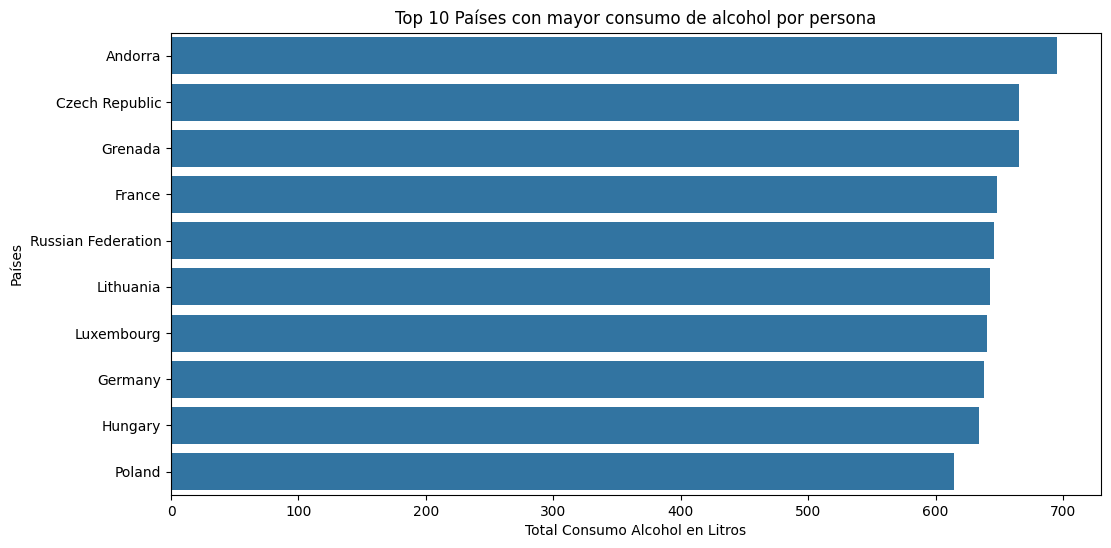

In [69]:
# Calcular total de bebidas con alcohol Global
Drinks['total_alcohol'] = Drinks['beer_servings'] + Drinks['spirit_servings'] + Drinks['wine_servings']

# Gráfico de los 10 países con mayor consumo de bebidas con alcohol por persona a nivel mundial
plt.figure(figsize=(12, 6))
sns.barplot(x='total_alcohol', y='country', data=Drinks.sort_values('total_alcohol', ascending=False).head(10))
plt.title('Top 10 Países con mayor consumo de alcohol por persona')
plt.xlabel('Total Consumo Alcohol en Litros')
plt.ylabel('Países')
plt.show()


En base al primer gráfico se puede observar que los países de latinoamerica no están en el top 10 del ranking de países con mayor consumo de alcohol del mundo. En base a donde se está realizando este estudio, se hace otro gráfico analizando el consumo de litros de alcohol por persona en latinoamerica, donde, en teoría, sería más sencillo emprender la iniciativa de negocio:

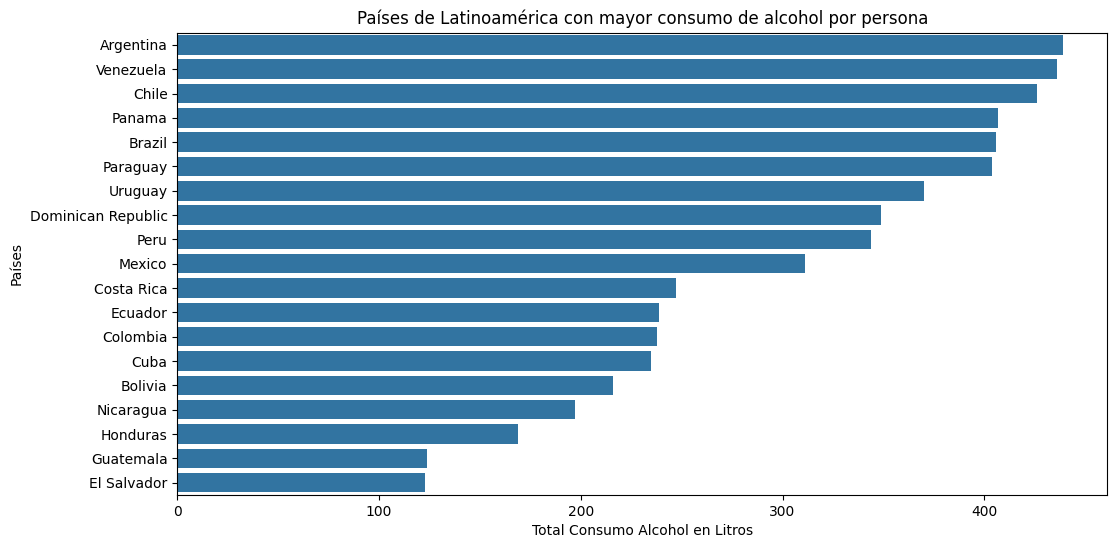

In [70]:
# Calcular total de consumo de alcohol en latinoamerica
latin_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
drinks_la = Drinks[Drinks['country'].isin(latin_america)]

# Gráfico de los países de Latinoamérica con mayor consumo de alcohol por persona
plt.figure(figsize=(12, 6))
sns.barplot(x='total_alcohol', y='country', data=drinks_la.sort_values('total_alcohol', ascending=False))
plt.title('Países de Latinoamérica con mayor consumo de alcohol por persona')
plt.xlabel('Total Consumo Alcohol en Litros')
plt.ylabel('Países')
plt.show()


En base al TOP 3 de países con mayor consumo de alcohol, se analiza la preferencia de la cerveza como bebida para dicho consumo de alcohol.

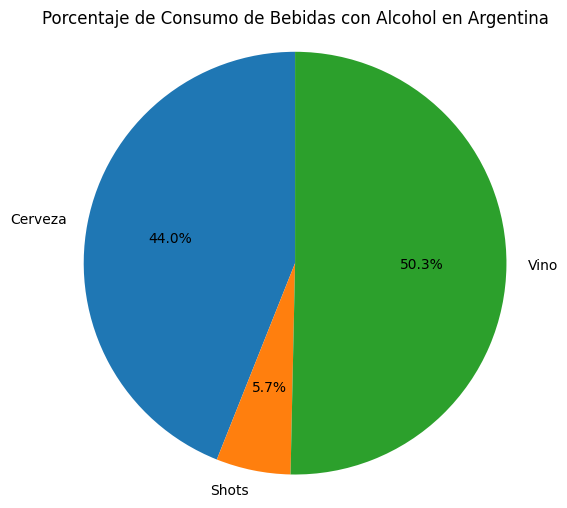

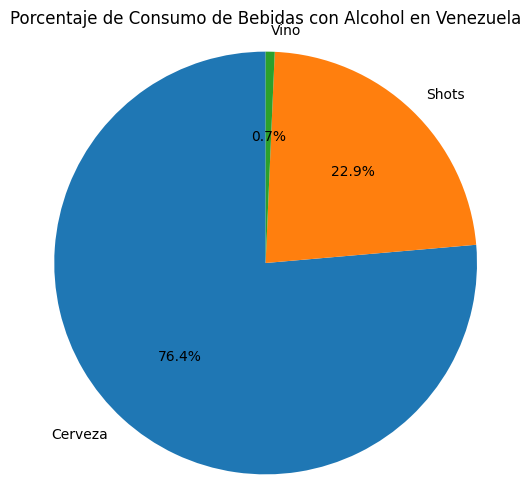

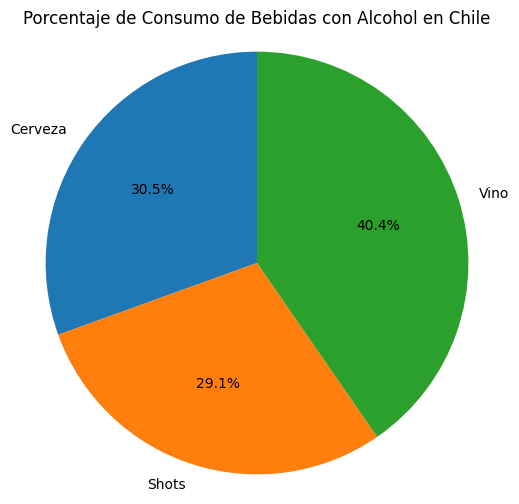

In [71]:
top3_countries = drinks_la.sort_values('total_alcohol', ascending=False).head(3)

for index, row in top3_countries.iterrows():
    country = row['country']
    beer = row['beer_servings']
    spirit = row['spirit_servings']
    wine = row['wine_servings']
    total = row['total_alcohol']

    labels = ['Cerveza', 'Shots', 'Vino']
    sizes = [beer / total * 100, spirit / total * 100, wine / total * 100]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Porcentaje de Consumo de Bebidas con Alcohol en {country}')
    plt.axis('equal')
    plt.show()


Se puede apreciar que en los principales países con consumo de alcohol en latinoamerica, la cerveza está en el primer y segundo puesto de la bebida de mayor consumo. Especialmente en Argentina y en Venezuela, la cerveza es de especial atractivo al momento de consumir alcohol. **Esto nos responde la primera pregunta relevante que establecimos en base a nuestras hipotesis:** **¿Que países muestran un mayor consumo de cerveza como la bebida con alcohol de preferencia?**

* **2. **

En base al conjunto de datos en "Death", cuales son las enfermedades con mayor cantidad de muertes? Están estas relacionadas con el alcohol? Se corresponde con los países de mayor consumo de alcohol?

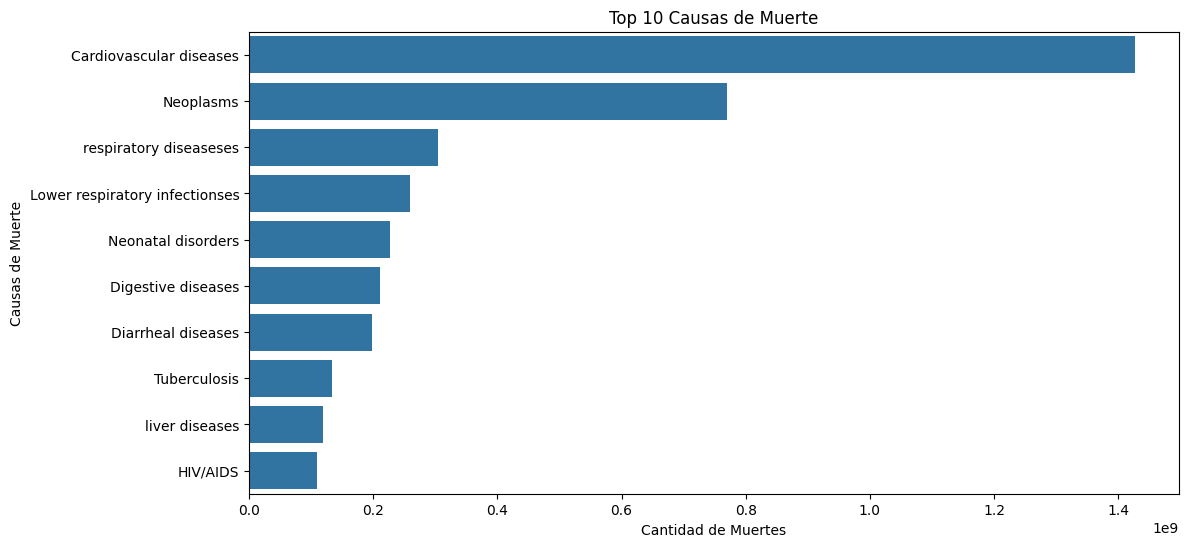

In [72]:
top_10_causes = Death.drop(columns=['Region']).sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_causes.values, y=top_10_causes.index)
plt.title('Top 10 Causas de Muerte')
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Causas de Muerte')
plt.show()


Los datos presentados en el gráfico muestran claramente que el alcohol está estrechamente relacionado con la mayoría de las principales causas de muerte a nivel mundial. Se observa una fuerte incidencia en enfermedades cardiovasculares, hepáticas y digestivas, donde el consumo excesivo de alcohol es un factor de riesgo clave. Además, su impacto en el sistema inmunológico puede aumentar la vulnerabilidad a tuberculosis, VIH/SIDA y enfermedades respiratorias, mientras que en el caso de los trastornos neonatales, su consumo durante el embarazo puede tener consecuencias graves. Estos resultados evidencian la necesidad de estrategias que fomenten un consumo responsable y alternativas más seguras para reducir el impacto del alcohol en la mortalidad global.

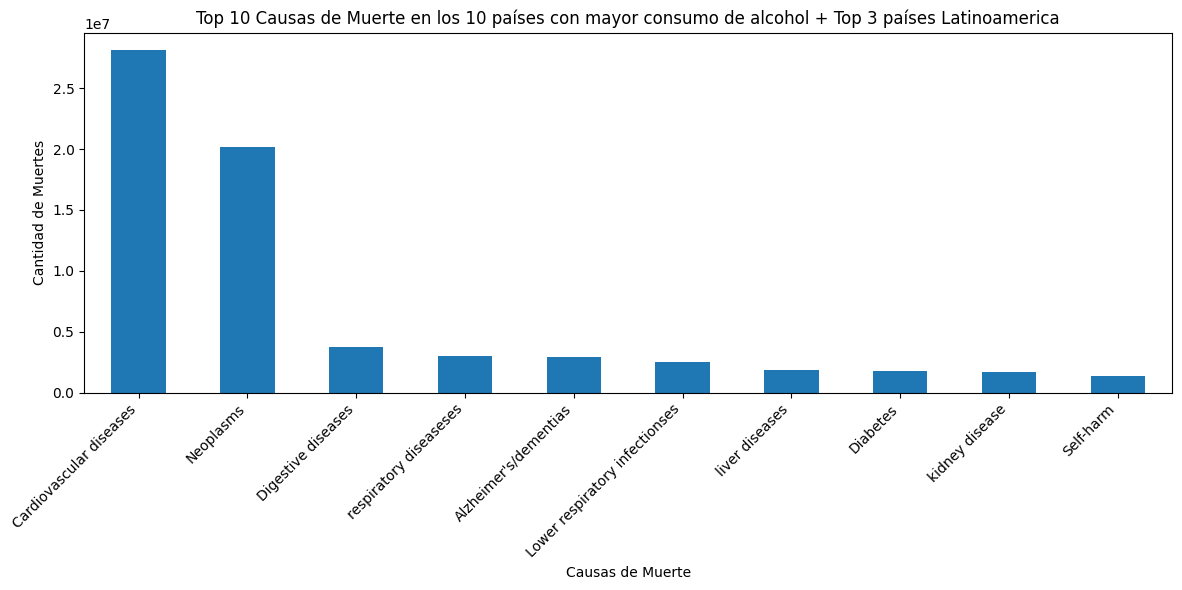

In [73]:
top_alcohol_countries = Drinks.sort_values('total_alcohol', ascending=False).head(10)
top_alcohol_countries_names = top_alcohol_countries['country'].tolist()
top3_countries_list = top3_countries['country'].tolist()
countries_to_plot = list(set(top_alcohol_countries_names + top3_countries_list))
death_filtered = Death[Death['Region'].isin(countries_to_plot)]
causes_of_death_by_country = death_filtered.drop(columns=['Region']).sum()

plt.figure(figsize=(12, 6))
causes_of_death_by_country.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Causas de Muerte en los 10 países con mayor consumo de alcohol + Top 3 países Latinoamerica')
plt.xlabel('Causas de Muerte')
plt.ylabel('Cantidad de Muertes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [74]:
top_alcohol_countries = Drinks.sort_values('total_alcohol', ascending=False).head(10)
top_alcohol_countries_names = top_alcohol_countries['country'].tolist()
top3_countries_list = top3_countries['country'].tolist()
countries_to_analyze = list(set(top_alcohol_countries_names + top3_countries_list))
country_death_causes = {}

for country in countries_to_analyze:
  country_death_data = Death[Death['Region'] == country]
  if not country_death_data.empty:
      top3_causes = country_death_data.drop(columns=['Region']).iloc[0].nlargest(3).index.tolist()
      country_death_causes[country] = top3_causes
  else:
      country_death_causes[country] = ["Datos no disponibles"]

death_causes_table = pd.DataFrame(country_death_causes.items(), columns=['País', 'Top 3 Causas de Muerte'])
death_causes_table


,País,Top 3 Causas de Muerte
0,Grenada,"[Cardiovascular diseases, Neoplasms, Diabetes]"
1,Germany,"[Cardiovascular diseases, Neoplasms, Digestive..."
2,Venezuela,"[Cardiovascular diseases, Neoplasms, Interpers..."
3,Argentina,"[Cardiovascular diseases, Neoplasms, Lower res..."
4,Lithuania,"[Cardiovascular diseases, Neoplasms, Digestive..."
5,Poland,"[Cardiovascular diseases, Neoplasms, Digestive..."
6,France,"[Neoplasms, Cardiovascular diseases, Alzheimer..."
7,Hungary,"[Cardiovascular diseases, Neoplasms, Digestive..."
8,Chile,"[Cardiovascular diseases, Neoplasms, Digestive..."
9,Andorra,"[Neoplasms, Cardiovascular diseases, respirato..."


Se puede observar que evaluando los 10 países con mayor consumo de alcohol e incluyendo aquellos que se encuentran en el Top 3 de mayor consumo de latinoamerica se converva la mayoría de las enfermedades de causa de muerte principales a nivel mundial que además tienen relación directa con el consumo de alcohol.
**Esto responde la pregunta crucial de si existe una relación directa entre los países con mayor consumo de cerveza y las tasas de enfermedades relacionadas con el alcohol.**

* **3. **

Para poder conocer las caracteristicas mejor valoradas de la cerveza y los componentes que la hacen atractiva al momento de elegirla como la bebida con alcohol para consumir, se obtiene información del dataset "BeerRanking".


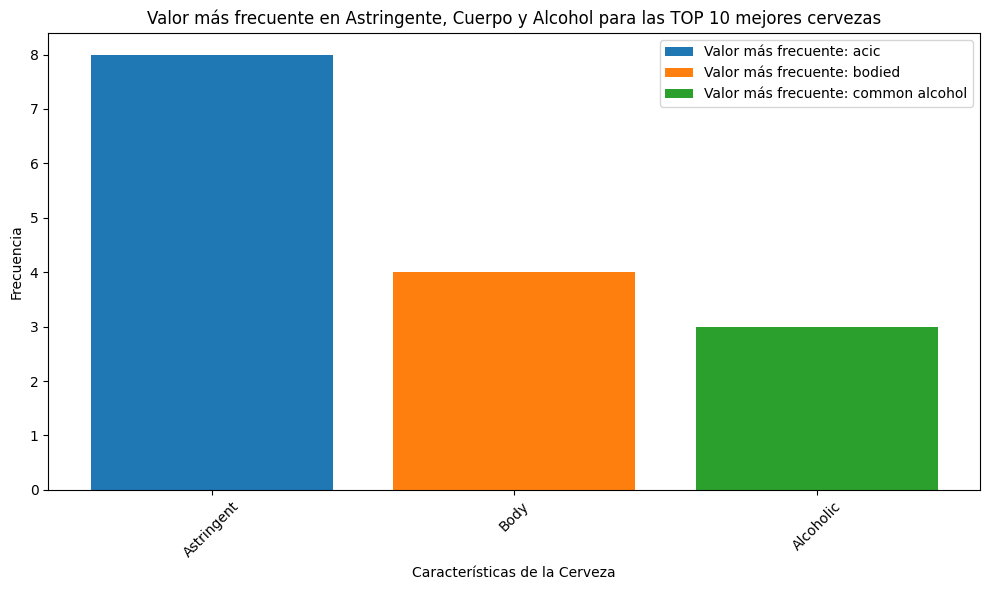

In [75]:
top_10_beers = BeerRanking.head(10)
columnas = ["Astringent", "Body", "Alcoholic"]
plt.figure(figsize=(10, 6))

for columna in columnas:
    valor_mas_frecuente = top_10_beers[columna].mode()[0]
    frecuencia = top_10_beers[columna].value_counts()[valor_mas_frecuente]
    plt.bar(columna, frecuencia, label=f"Valor más frecuente: {valor_mas_frecuente}")


plt.xlabel("Características de la Cerveza")
plt.ylabel("Frecuencia")
plt.title("Valor más frecuente en Astringente, Cuerpo y Alcohol para las TOP 10 mejores cervezas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


En base al TOP 10 de cervezas mejor rankeadas, se prefieren aquellas cervezas que posean las siguientes caracteristicas:
* Astringente: *Ácido*
* Cuerpo: *Con Cuerpo*
* Alcohol: *Común*

**Con esto se da respuesta a la pregunta inicialmente planteada: ¿Qué características de las cervezas mejor valoradas (según el ranking y descripciones) pueden ser replicadas en una versión sin alcohol para hacerla más atractiva?.**

También se debe tener en consideración que no solo el cuerpo y sabor de la cerveza la hacen atractiva a la hora de elegirla para su consumo. Factores como el precio, la accesibilidad, la cultura y la estrategia de marketing que la marca que la produce haya implementado en cada país, también juegan un factor fundamental.

 * **4. **

 Respondiendo la última incognita: ¿Existe alguna relación entre la popularidad de ciertas características de las cervezas y la percepción de un consumo "más saludable", que podría favorecer el desarrollo de alternativas sin alcohol?

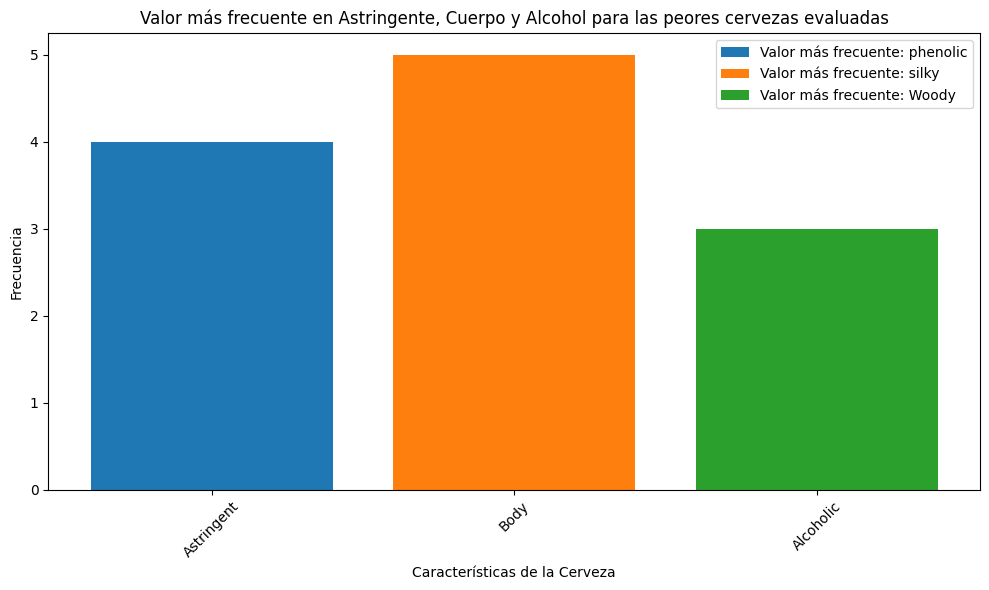

In [76]:
last_10_beers = BeerRanking.tail(10)
columnas = ["Astringent", "Body", "Alcoholic"]
plt.figure(figsize=(10, 6))

for columna in columnas:
    valor_mas_frecuente = last_10_beers[columna].mode()[0]
    frecuencia = last_10_beers[columna].value_counts()[valor_mas_frecuente]
    plt.bar(columna, frecuencia, label=f"Valor más frecuente: {valor_mas_frecuente}")

plt.xlabel("Características de la Cerveza")
plt.ylabel("Frecuencia")
plt.title("Valor más frecuente en Astringente, Cuerpo y Alcohol para las peores cervezas evaluadas")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Las cervezas peor evaluadas comparten las siguientes caracteristicas según los encuestados:
* Astringente: *Fenólico*
* Cuerpo: *Sedoso*
* Alcohol: *Común*

Si bien para responder la pregunta en cuestión se debe asumir en base a los valores analizados, todo indica que aquellas cervezas con sabores y sensaciones distintas a las tradicionales, no son consideradas cervezas populares para el paladar común. Esto puede favorecer el consumo de cervezas más saludables dado que se puede interpretar que lo que se busca en la bebida es la simpleza de las cervezas comunes sin aditivos ni azucares agregados.

## Machine Learning

En nuestro Marchine Learning, vamos a predecir el consumo total de cervezas, así como los países con mayor consumo para definir donde sería ideal la propuesta comercial de una cerveza sin alcohol.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Variable Objetivo: Consumo total de cerveza
x = Drinks.drop(columns=['beer_servings'])
y = Drinks['beer_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluación de Modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicción de los 10 países con mayor consumo de cerveza
top10_countries = Drinks.nlargest(10, 'beer_servings')

print("Predicción de los 10 países con mayor consumo de cervezas:")
for i in range(len(top10_countries)):
    print(f"{top10_countries.iloc[i]['country']}: Predicted Alcohol Consumption = {top10_predictions[i]}")

Mean Squared Error: 1.9629439554442933e-26
Predicción de los 10 países con mayor consumo de cervezas:
Namibia: Predicted Alcohol Consumption = 695.0
Czech Republic: Predicted Alcohol Consumption = 665.0000000000001
Gabon: Predicted Alcohol Consumption = 665.0000000000002
Germany: Predicted Alcohol Consumption = 648.0
Lithuania: Predicted Alcohol Consumption = 646.0000000000001
Poland: Predicted Alcohol Consumption = 643.0000000000001
Venezuela: Predicted Alcohol Consumption = 640.0
Ireland: Predicted Alcohol Consumption = 638.0000000000001
Palau: Predicted Alcohol Consumption = 634.0000000000001
Romania: Predicted Alcohol Consumption = 614.0000000000001


A primera instancia podemos dar notar que el **MSE prácticamente es cero**, lo que indica que el modelo está prediciendo casi exactamente los valores observados en el test. Esto suele ocurrir cuando:

*   Hay muy pocas observaciones o el dataset es pequeño y linealmente separable.O existe fuga de información entre entrenamiento y test.
*   El modelo ha memorizado los datos en lugar de aprender patrones generalizables.
*   Las predicciones coinciden punto por punto con los consumos reales en los países top 10, lo que valida que la regresión lineal aprendió la relación inmediata en los datos disponibles, pero no garantiza que funcione igual de bien con nuevos países o en otro período.

Por ello es necesario realizar validación cruzada y testear otros modelos para detectar la variación. También hace falta comparar con Random Forest, Gradient Boosting u otros regresores más robustos.

**Validación Cruzada**

In [80]:
X = Drinks.drop(columns=['beer_servings','country'])
y = Drinks['beer_servings']

from sklearn.model_selection import cross_val_score

lr = LinearRegression()

# 5‑fold CV, métrica MAE (negativa en sklearn)
scores_mae = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# convertimos signo y mostramos
mae_mean = -scores_mae.mean()
mae_std  =  scores_mae.std()
print(f"LinearRegression CV MAE: {mae_mean:.2f} ± {mae_std:.2f}")


LinearRegression CV MAE: 0.00 ± 0.00


In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

for name, model in [('LinearRegression', lr), ('RandomForest', rf)]:
    scores = cross_val_score(
        model, X, y,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    rmse = (-scores)**0.5       # convertir MSE negativo a RMSE positivo
    print(f"{name} CV RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

LinearRegression CV RMSE: 0.00 ± 0.00
RandomForest CV RMSE: 34.31 ± 10.70


El error de 34 servings nos dice que, con un modelo no lineal sin optimizar, las predicciones quedan **en promedio a 34 unidades del valor real**. La gran desviación (±10.7) muestra alta variabilidad entre folds, señal de que **el modelo no es aún estable**.

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators':      [100, 200, 500],
    'max_depth':         [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X, y)

print("RF best params:", grid_rf.best_params_)
print("RF best RMSE:", -grid_rf.best_score_)
best_rf = grid_rf.best_estimator_

Fitting 4 folds for each of 27 candidates, totalling 108 fits
RF best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RF best RMSE: 36.7607744792497


In [83]:
from sklearn.linear_model import Ridge, Lasso

# definimos grilla de alphas
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0]}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge,
                          cv=4, scoring='neg_mean_squared_error')
grid_lasso = GridSearchCV(Lasso(max_iter=5000), param_grid_lasso,
                          cv=4, scoring='neg_mean_squared_error')

grid_ridge.fit(X, y)
grid_lasso.fit(X, y)

print("Ridge best alpha:", grid_ridge.best_params_,
      "RMSE:", (-grid_ridge.best_score_)**0.5)
print("Lasso best alpha:", grid_lasso.best_params_,
      "RMSE:", (-grid_lasso.best_score_)**0.5)

best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_

Ridge best alpha: {'alpha': 0.1} RMSE: 4.182121242007468e-05
Lasso best alpha: {'alpha': 0.001} RMSE: 0.0005291884157413303


In [84]:
import pandas as pd

# entrenar el best_rf sobre todo X,y
best_rf.fit(X, y)

# extraer importancias
importances = best_rf.feature_importances_
features    = X.columns

imp_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values('importance', ascending=False)

print(imp_df)

                        feature  importance
3                 total_alcohol    0.830515
0               spirit_servings    0.072704
1                 wine_servings    0.058442
2  total_litres_of_pure_alcohol    0.038339


**Las conclusiones** que se pueden obtener hasta este punto es que la filtración de la data es a través de *total_alcohol* y está distorsionando el modelo como se puede venir observando desde los resultados de la validación cruzada.

Las demás features tienen un efecto muy menor; un modelo sin la filtración debería apoyarse más en las otra variables.

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Drinks_clean = Drinks.drop(columns=['total_alcohol'])

X = Drinks_clean.drop(columns=['beer_servings','country'])
y = Drinks_clean['beer_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_feats = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_feats = ['continent'] if 'continent' in X.columns else []
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

pipe_lr    = Pipeline([('pre', preprocessor), ('m', LinearRegression())])
pipe_rf    = Pipeline([('pre', preprocessor), ('m', RandomForestRegressor(random_state=42))])

print("=== Cross‑Validation on TRAIN ===")
for name, pipe in [('LinearRegression', pipe_lr), ('RandomForest', pipe_rf)]:
    # MAE
    mae_scores = cross_val_score(pipe, X_train, y_train,
                                 cv=5,
                                 scoring='neg_mean_absolute_error',
                                 n_jobs=-1)
    # RMSE
    mse_scores = cross_val_score(pipe, X_train, y_train,
                                 cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1)
    rmse_scores = (-mse_scores)**0.5
    print(f"{name} CV MAE: {(-mae_scores).mean():.2f} ± {mae_scores.std():.2f}")
    print(f"{name} CV RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

param_grid_rf = {
    'm__n_estimators':      [100, 200, 500],
    'm__max_depth':         [None, 5, 10],
    'm__min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(pipe_rf,
                       param_grid=param_grid_rf,
                       cv=4,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=1)
grid_rf.fit(X_train, y_train)
print("RF best params:", grid_rf.best_params_)
print("RF best CV RMSE:", -grid_rf.best_score_)

param_grid_ridge = {'m__alpha': [0.01, 0.1, 1.0, 10.0]}
grid_ridge = GridSearchCV(
    Pipeline([('pre', preprocessor), ('m', Ridge())]),
    param_grid=param_grid_ridge,
    cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_ridge.fit(X_train, y_train)
print("Ridge best params:", grid_ridge.best_params_)
print("Ridge best CV RMSE:", -grid_ridge.best_score_)

# — Paso 7: Evaluación final en TEST‑set
best_rf    = grid_rf.best_estimator_
best_ridge = grid_ridge.best_estimator_

for name, model in [('RF_optimizado', best_rf), ('Ridge_optimizado', best_ridge)]:
    y_pred = model.predict(X_test)
    mse_val  = mean_squared_error(y_test, y_pred)
    rmse_val = np.sqrt(mse_val)
    mae_val  = mean_absolute_error(y_test, y_pred)
    r2_val   = r2_score(y_test, y_pred)
    print(f"\n{name} — Test MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}, R²: {r2_val:.3f}")


=== Cross‑Validation on TRAIN ===
LinearRegression CV MAE: 35.38 ± 8.79
LinearRegression CV RMSE: 52.88 ± 15.77
RandomForest CV MAE: 33.69 ± 6.77
RandomForest CV RMSE: 47.39 ± 12.08
Fitting 4 folds for each of 27 candidates, totalling 108 fits
RF best params: {'m__max_depth': 10, 'm__min_samples_split': 2, 'm__n_estimators': 500}
RF best CV RMSE: 54.48988677713391
Ridge best params: {'m__alpha': 1.0}
Ridge best CV RMSE: 54.868457638714574

RF_optimizado — Test MAE: 36.64, RMSE: 54.80, R²: 0.773

Ridge_optimizado — Test MAE: 37.66, RMSE: 54.34, R²: 0.777


El Ridge, con RMSE ligeramente inferior (54.34 vs. 54.80) y R² un poco más alto (0.777 vs. 0.773), comete menos errores extremos y captura mejor la variabilidad global, así que en conjunto es más estable y fiable para predecir consumo, aunque su MAE individual sea algo mayor.

Por lo tanto, **Ridge** es tu mejor opción porque: Generaliza un poquito mejor a datos nuevos y su simplicidad reduce riesgo de sobreajuste.

## Conclusiones

Tras comparar via validación cruzada y en el conjunto de test los errores (MAE y RMSE) y el coeficiente de determinación (R²), elegimos definitivamente el modelo Ridge (α=1.0). Aunque el Random Forest obtuvo un MAE ligeramente mejor, el Ridge presentó un RMSE más bajo en el test‑set y un R² superior, lo que indica que sus predicciones son más estables (menos errores grandes) y que explica un mayor porcentaje de la variabilidad real del consumo de cerveza entre países. Así que que utilizará a continuación:

In [91]:
best_ridge.fit(X, y)

top10 = Drinks.nlargest(10, 'beer_servings').copy()
X_top10 = top10.drop(columns=['beer_servings','country'])

top10['predicted_beer_servings'] = best_ridge.predict(X_top10)

print(top10[['country', 'beer_servings', 'predicted_beer_servings']])

            country  beer_servings  predicted_beer_servings
117         Namibia            376               191.992160
45   Czech Republic            361               271.086828
62            Gabon            347               218.985137
65          Germany            346               262.239421
98        Lithuania            343               298.449878
135          Poland            343               248.620216
188       Venezuela            333               194.301122
81          Ireland            313               266.583510
129           Palau            306               176.856076
140         Romania            297               236.963737


Al aplicar el Ridge final sobre los diez países con mayor consumo histórico, vemos que tiende a subestimar sistemáticamente el valor real de “beer_servings”. Por ejemplo, Namibia consumió 376 servings pero el modelo predice ~192; en Lituania la predicción (298) queda por debajo del real (343).

Este sesgo a la baja sugiere que, si bien el modelo capta la tendencia general (países con mayor consumo reciben predicciones más altas), probablemente **necesitemos incorporar variables adicionales (PIB, clima, precio) para ajustar mejor los extremos superiores**. No obstante, el Ridge logra ordenar correctamente el ranking de consumo y explica cerca del **78%** de la variabilidad, por lo que constituye una base sólida para futuras mejoras.

## Recomendaciones

Estos datos adicionales se deberán obtener de fuentes oficiales o en su defecto, consultar las politicas de privacidad que requiera el destinatario final del analisis de datos. Habitualmente, los datos adicionales serán provistos por el mismo o en su defecto, se provee el modelo de predicción con las indicaciones de sus falencias.